**L076_KDE.ipynb**

2024 JUN 11

Tershire

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)

# data

In [3]:
np.random.seed(0)

In [4]:
X = np.random.normal(0, 1, size=30)
print(X)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


## visualization

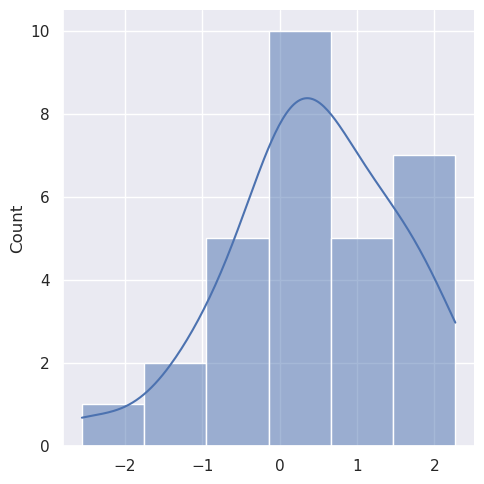

In [5]:
sns.displot(X, kde=True)

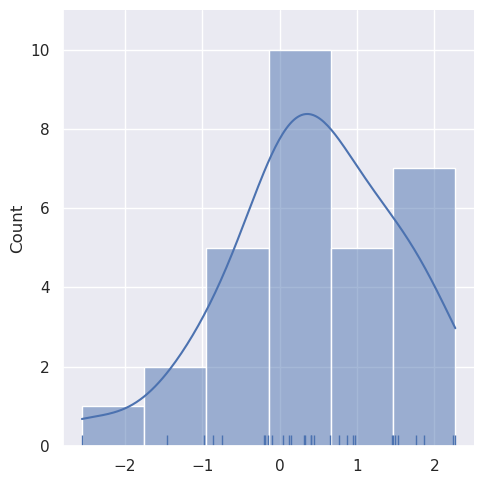

In [6]:
sns.displot(X, kde=True, rug=True)

# KDE: manual

## kernels

In [7]:
from scipy import stats

In [8]:
def optimal_bandwidth_for_gaussian_kernel(X):
    return 1.06 * X.std() * X.size ** (-1 / 5)

<Axes: >

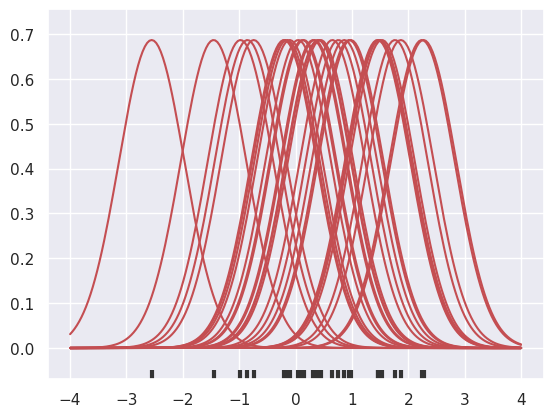

In [9]:
bandwidth = optimal_bandwidth_for_gaussian_kernel(X)
support = np.linspace(-4, 4, 200)

kernels = []
for x in X:
    kernel = stats.norm(x, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(X, color="0.2", linewidth=3)

## mean of kernels

In [10]:
from scipy.integrate import trapezoid

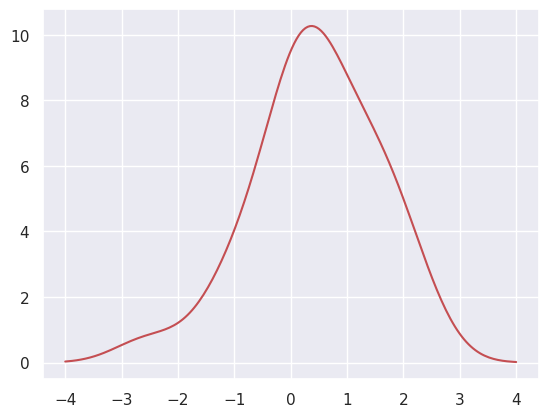

In [11]:
sum_of_kernels = np.sum(kernels, axis=0)
plt.plot(support, sum_of_kernels, c='r')

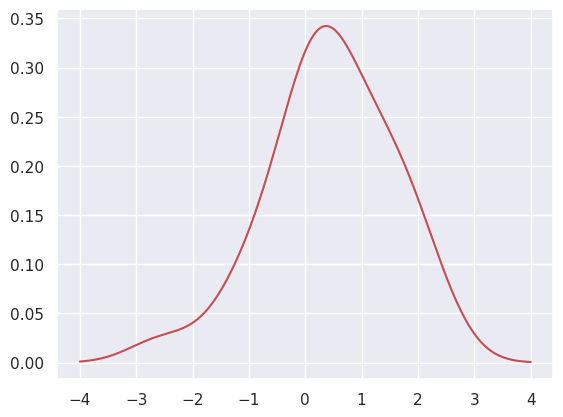

In [12]:
density = sum_of_kernels / trapezoid(sum_of_kernels, support)
plt.plot(support, density, c='r')

<Axes: ylabel='Density'>

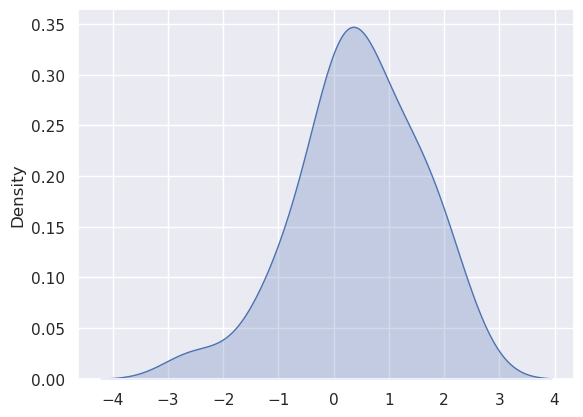

In [13]:
# directly using seaborn
sns.kdeplot(X, fill=True)

## KDE depending on bandwidth

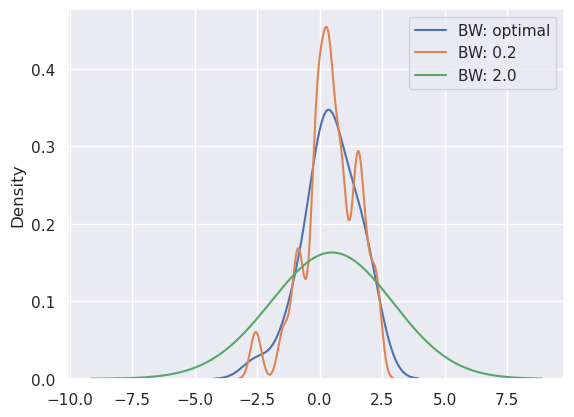

In [17]:
sns.kdeplot(X, label="BW: optimal")
sns.kdeplot(X, bw_method=0.2, label="BW: 0.2")
sns.kdeplot(X, bw_method=2.0, label="BW: 2.0")

plt.legend()